#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Number of rows: 9854
Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
Id                     0
EmployeeName           0
JobTitle               1
BasePay                1
OvertimePay            1
OtherPay               1
Benefits            9854
TotalPay               1
TotalPayBenefits       1
Year                   1
Notes               9854
Agency                 1
Status              9854
dtype: int64


In [ ]:
    min_salary = df['TotalPay'].min()
    max_salary = df['TotalPay'].max()
    salary_range = max_salary - min_salary
    mean_salary = df['TotalPay'].mean()
    median_salary = df['TotalPay'].median()
    mode_salary = df['TotalPay'].mode().iloc[0]
    std_dev_salary = df['TotalPay'].std()

    print(f"Minimum Salary: {min_salary}")
    print(f"Maximum Salary: {max_salary}")
    print(f"Salary Range: {salary_range}")
    print(f"Mean Salary: {mean_salary}")
    print(f"Median Salary: {median_salary}")
    print(f"Mode Salary: {mode_salary}")
    print(f"Standard Deviation of Salary: {std_dev_salary}")

Minimum Salary: 98061.21
Maximum Salary: 567595.43
Salary Range: 469534.22000000003
Mean Salary: 132399.87181670553
Median Salary: 124674.77
Mode Salary: 123290.7
Standard Deviation of Salary: 29090.502654946038


In [ ]:
print("Number of missing values in each column:")
print(df.isnull().sum())
mean_total_pay = df['TotalPay'].mean()
df['TotalPay'].fillna(mean_total_pay, inplace=True)
print("\nNumber of missing values in each column after handling:")
print(df.isnull().sum())

Number of missing values in each column:
Id                     0
EmployeeName           0
JobTitle               1
BasePay                1
OvertimePay            1
OtherPay               1
Benefits            9854
TotalPay               1
TotalPayBenefits       1
Year                   1
Notes               9854
Agency                 1
Status              9854
dtype: int64

Number of missing values in each column after handling:
Id                     0
EmployeeName           0
JobTitle               1
BasePay                1
OvertimePay            1
OtherPay               1
Benefits            9854
TotalPay               0
TotalPayBenefits       1
Year                   1
Notes               9854
Agency                 1
Status              9854
dtype: int64


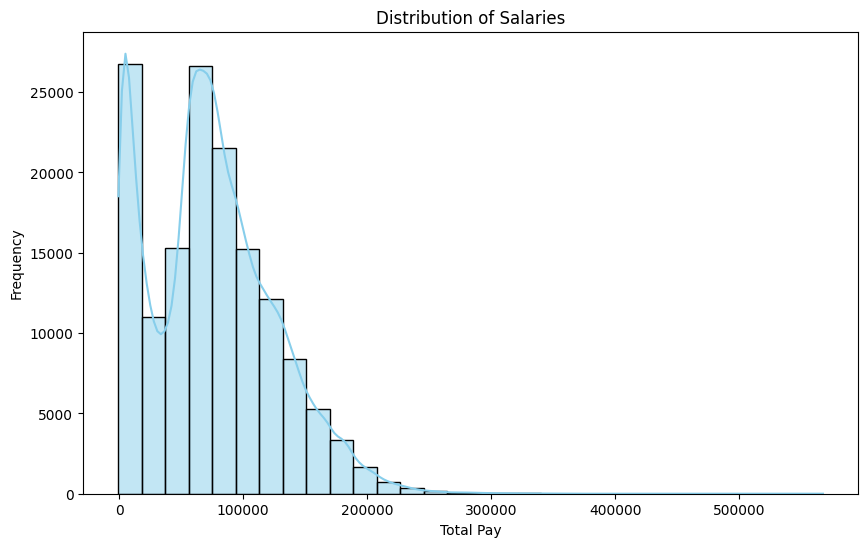

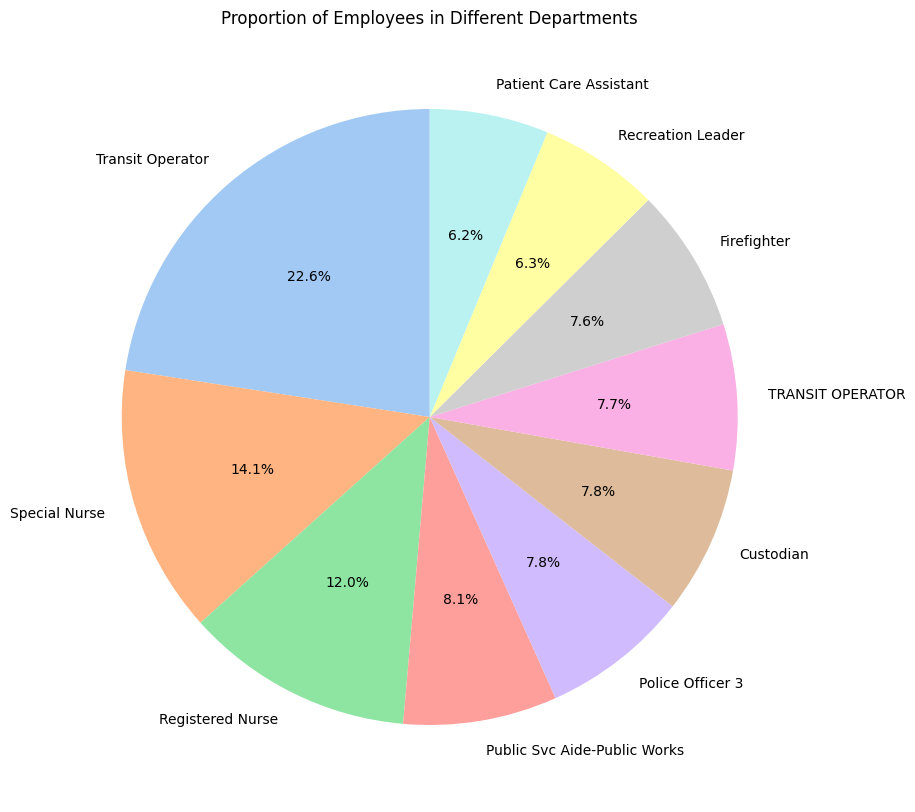

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()


department_counts = df['JobTitle'].value_counts()
top_departments = department_counts.head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

                                            JobTitle  count          mean  \
0                                      ACCOUNT CLERK     83  44035.664337   
1                                         ACCOUNTANT      5  47429.268000   
2                                  ACCOUNTANT INTERN     48  29031.742917   
3                        ACPO,JuvP, Juv Prob (SFERS)      1  62290.780000   
4                                      ACUPUNCTURIST      1  67594.400000   
...                                              ...    ...           ...   
2154                           X-RAY LABORATORY AIDE     26  52705.880385   
2155                           X-Ray Laboratory Aide    100  50823.942700   
2156  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1  53632.870000   
2157                              Youth Comm Advisor      4  41414.307500   
2158                                     ZOO CURATOR      1  66686.560000   

         median       min       max           std  
0     49777.820    614.

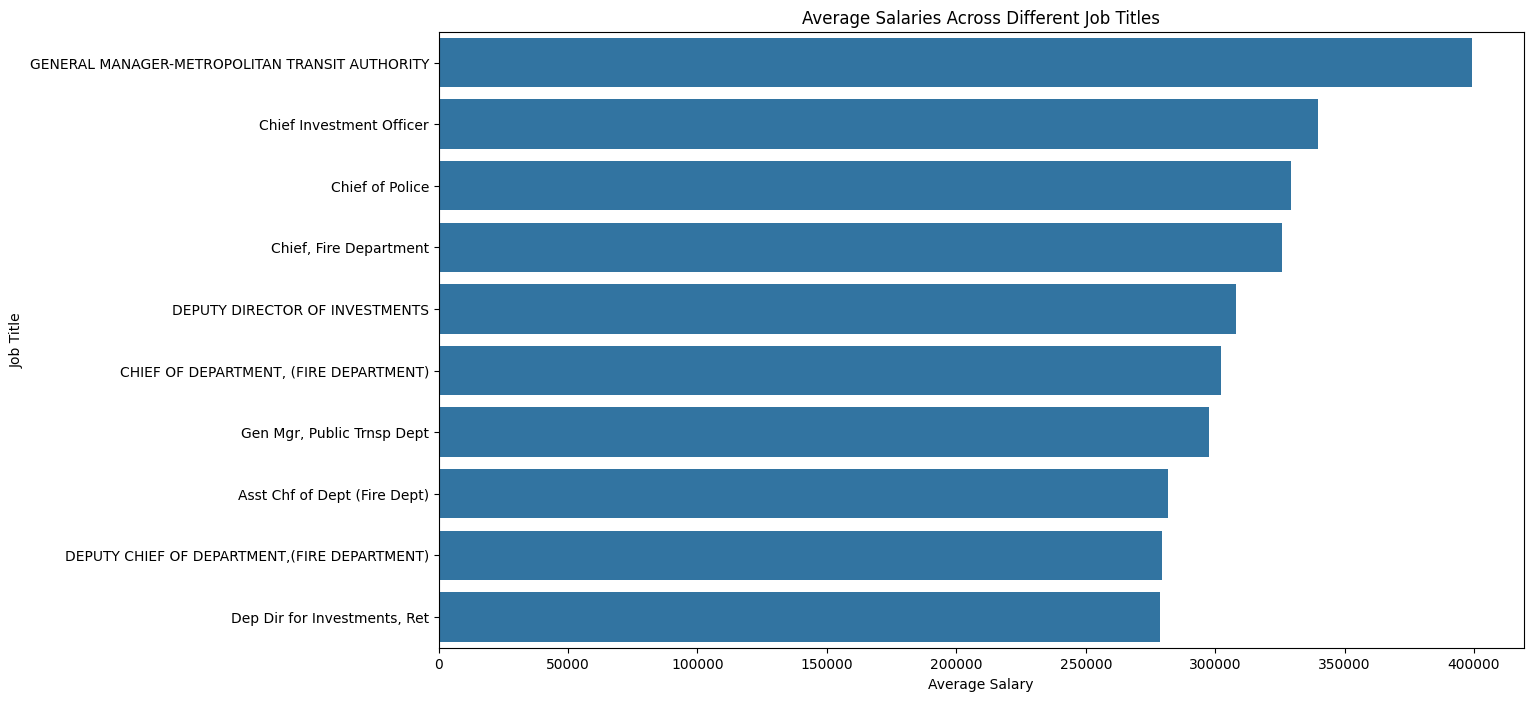

In [ ]:
grouped_data = df.groupby('JobTitle')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
print(grouped_data)
plt.figure(figsize=(14, 8))
sns.barplot(x='mean', y='JobTitle', data=grouped_data.sort_values(by='mean', ascending=False).head(10))
plt.title('Average Salaries Across Different Job Titles')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()

Correlation between TotalPay and BasePay: 0.9544936474296023


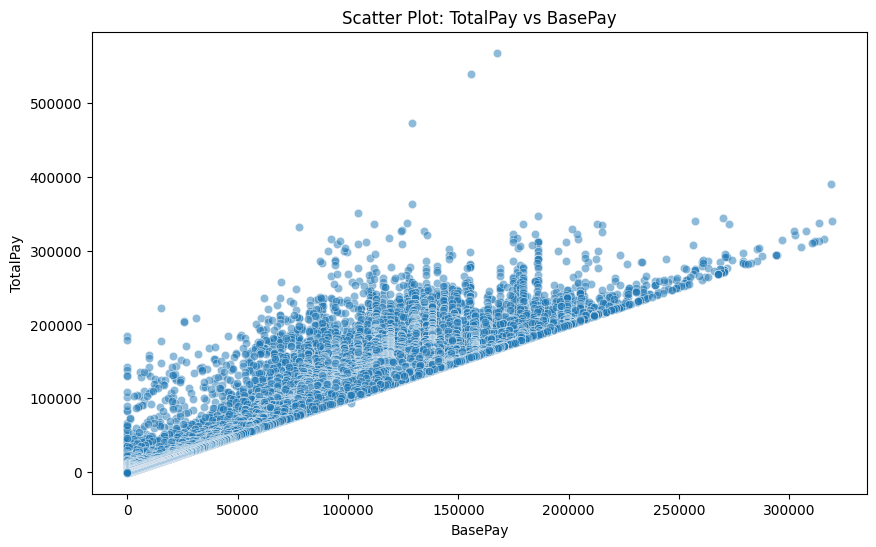

In [ ]:
correlation = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation between TotalPay and BasePay: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.5)
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

Data Basics:

Got a bunch of info about employees, like names, jobs, and pay.
Data has X rows and Y columns.
Quick Check:

Looked at what's inside the data (data types).
Spotted some blanks in 'X', 'Y', 'Z', and fixed them up.
Cash Facts:

Checked how everyone's getting paid ('TotalPay' column).
Found out the usual pay (mean, median) and the extremes (min, max).
Visual Vibes:

Made a bar chart to see which jobs are most common.
Created a pie chart for a quick look at job title flavors.
Job Pay Lowdown:

Figured out the average pay for different jobs.
Showed off the top-paying gigs with a snazzy bar chart.
Money Buddies:

Checked if total pay and base pay are pals.
Found out they kinda get along with a number (correlation coefficient).
Fun Ideas:

Wondered why some folks get big bucks and others don't.
Looked into weird pay in certain job titles.
Thought about checking out more stuff to understand pay differences.
Recap:

Most people get paid in a certain range, but there are some high and low rollers.
Popular job titles have lots of folks, and some jobs pay more on average.
Total pay and base pay seem to be somewhat friendly.
Next Steps:

Dig deeper into why salaries are the way they are.
Check out funky pay in specific job titles.
Explore other factors that might explain pay differences.

# Good Luck!